# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Abyan Ramzi
- Email: abyanramzi.ta@gmail.com
- ID Dicoding:

In [1]:
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/MyPath

Mounted at /content/drive
/content/drive/MyDrive/MyPath


In [2]:
!ls

'E-Commerce Public Dataset'	 Projek-Analisa-Data.ipynb   Untitled0.ipynb
 E-commerce-public-dataset.zip	 ProjekAnalisaData.ipynb


In [3]:
%cd E-Commerce Public Dataset

/content/drive/MyDrive/MyPath/E-Commerce Public Dataset


In [4]:
!ls

 customers_dataset.csv	   order_payments_dataset.csv		   products_dataset.csv
 geolocation_dataset.csv   order_reviews_dataset.csv		   sellers_dataset.csv
'New Text Document.txt'    orders_dataset.csv
 order_items_dataset.csv   product_category_name_translation.csv


## Determining the Question

## Import Library

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
# Load the datasets
customers_df = pd.read_csv('customers_dataset.csv')
products_df = pd.read_csv('products_dataset.csv')
order_items_df = pd.read_csv('order_items_dataset.csv')
orders_df = pd.read_csv('orders_dataset.csv')
product_translation_df = pd.read_csv('product_category_name_translation.csv')

customers_df['customer_city'] = customers_df['customer_city'].str.title()
product_translation_df['product_category_name_english'] = product_translation_df['product_category_name_english'].str.replace('_', ' ').str.title()

### Data Assessing

In [7]:
print(customers_df.info())
print(customers_df.isnull().sum())
print(customers_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
0


In [8]:
print(products_df.info())
print(products_df.isnull().sum())
print(products_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
prod

In [9]:
print(order_items_df.info())
print(order_items_df.isnull().sum())
print(order_items_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
0


In [10]:
print(orders_df.info())
print(orders_df.isnull().sum())
print(orders_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date

In [11]:
print(product_translation_df.info())
print(product_translation_df.isnull().sum())
print(product_translation_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None
product_category_name            0
product_category_name_english    0
dtype: int64
0


### Cleaning Data

In [12]:
customers_df = customers_df.drop_duplicates(subset='customer_id')
products_df = products_df.drop_duplicates(subset='product_id')
orders_df = orders_df.drop_duplicates(subset='order_id')

## Exploratory Data Analysis

### Explore

In [13]:
products_merged = products_df.merge(product_translation_df, on='product_category_name')
print(products_merged.head())

                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0     

In [14]:
merged_data = (
    orders_df
    .merge(order_items_df, on='order_id')
    .merge(products_merged, on='product_id')
    .merge(customers_df, on='customer_id')
)
# merged_data['customer_city'] = merged_data['customer_city'].str.title()
# Check the merged data
print("Merged Data:")
print(merged_data.shape)
print(merged_data.head())

Merged Data:
(111023, 27)
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 

#### RFM Analysis

In [15]:
# 1. Count total sales and customers for region with more than 900 customers
## Group by city to get total sales by region (city)
sales_by_region = merged_data.groupby('customer_city').agg({'price': 'sum'}).reset_index()
print(sales_by_region)
## Count number of customers in each city
customers_distribution = customers_df['customer_city'].value_counts().reset_index()
customers_distribution.columns = ['customer_city', 'num_customers']
print(customers_distribution)
## Merge sales and customer distribution on customer_city
merged_region_data = pd.merge(customers_distribution, sales_by_region, on='customer_city')
# Top 50 region by sales
all_region_sales_data = merged_region_data.groupby('customer_city').agg(
    total_sales=('price', 'sum'),
    num_customers=('num_customers', 'sum')
).reset_index()
top_n_region_by_sales = all_region_sales_data.nlargest(50,"total_sales")
average_customers_in_top_n = top_n_region_by_sales['num_customers'].mean()
average_sales_in_top_n = top_n_region_by_sales["total_sales"].mean()
print("Average number of customers for top 50 regions by total sales: ", average_customers_in_top_n)


            customer_city    price
0     Abadia Dos Dourados   358.90
1               Abadiania   949.99
2                  Abaete  1695.91
3              Abaetetuba  4028.57
4                 Abaiara   262.90
...                   ...      ...
4090             Xinguara  1282.22
4091          Xique-Xique   179.79
4092             Zacarias   198.80
4093              Ze Doca   688.60
4094               Zortea    69.90

[4095 rows x 2 columns]
          customer_city  num_customers
0             Sao Paulo          15540
1        Rio De Janeiro           6882
2        Belo Horizonte           2773
3              Brasilia           2131
4              Curitiba           1521
...                 ...            ...
4114           Bequimao              1
4115            Andarai              1
4116      Vargem Grande              1
4117        Curvelandia              1
4118  Eugenio De Castro              1

[4119 rows x 2 columns]
Average number of customers for top 50 regions by total sales:

In [16]:
## Filter for regions with more than 1000 customers
filtered_region_data = merged_region_data[merged_region_data['num_customers'] > average_customers_in_top_n]
# Filter for region with sales more than average
average_sales_in_filtered_region = filtered_region_data['price'].mean()
print("Average number of customers for top 50 regions by total sales: ", average_sales_in_filtered_region)
average_customers_in_filtered_region = filtered_region_data['num_customers'].mean()
print("Average number of customers for top 50 regions by total sales: ", average_customers_in_filtered_region)

## Sorting for city color pallete
city_order_by_customers = filtered_region_data.sort_values(by='num_customers', ascending=False)['customer_city'].tolist()
## Indexing top region
top_regions_index = filtered_region_data['customer_city']
## Calculate mean sales per customer for each region
region_sales_data = filtered_region_data.groupby('customer_city').agg(
    total_sales=('price', 'sum'),
    num_customers=('num_customers', 'sum')
).reset_index()
region_sales_data['mean_sales_per_customers'] = region_sales_data['total_sales'] / region_sales_data['num_customers']
## Sorting for visualization based on mean
city_order_by_mean_sales = region_sales_data.sort_values(by='mean_sales_per_customers', ascending=False)['customer_city'].tolist()


Average number of customers for top 50 regions by total sales:  491202.2433333333
Average number of customers for top 50 regions by total sales:  3789.3333333333335


In [17]:
# Filtered data for top regions
filtered_data = merged_data[(merged_data['customer_city'].isin(top_regions_index ))]

# Check the cleaned data
print("Filtered Data:")
print(filtered_data.shape)
print(filtered_data.head())

Filtered Data:
(38321, 27)
                            order_id                       customer_id  \
0   e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
9   e6ce16cb79ec1d90b1da9085a6118aeb  494dded5b201313c64ed7f100595b95c   
10  e6ce16cb79ec1d90b1da9085a6118aeb  494dded5b201313c64ed7f100595b95c   
11  34513ce0c4fab462a55830c0989c7edb  7711cf624183d843aafe81855097bc37   
13  5ff96c15d0b717ac6ad1f3d77225a350  19402a48fe860416adf93348aba37740   

   order_status order_purchase_timestamp    order_approved_at  \
0     delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
9     delivered      2017-05-16 19:41:10  2017-05-16 19:50:18   
10    delivered      2017-05-16 19:41:10  2017-05-16 19:50:18   
11    delivered      2017-07-13 19:58:11  2017-07-13 20:10:08   
13    delivered      2018-07-25 17:44:10  2018-07-25 17:55:14   

   order_delivered_carrier_date order_delivered_customer_date  \
0           2017-10-04 19:55:00           2017-10-10 21:25:13   
9      

In [39]:
# Convert purchase timestamp to datetime
filtered_data.loc[:, 'order_purchase_timestamp'] = pd.to_datetime(filtered_data['order_purchase_timestamp'], errors='coerce')
# Calculate Recency, Frequency, and Monetary only for customers with orders
latest_purchase = filtered_data['order_purchase_timestamp'].max()

rfm_df = filtered_data.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (latest_purchase - x.max()).days,
    'order_id': 'count',  # Frequency
    'price': 'sum'        # Ensure 'price' column exists
}).reset_index()
# Rename columns
rfm_df.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']
# print(rfm_df['Recency'].value_counts())
print(rfm_df['Frequency'].value_counts())
# print(rfm_df['Monetary'].value_counts())
total_rfm_customers = rfm_df['customer_id'].nunique()
print(total_rfm_customers)

Frequency
1     29791
2      2713
3       449
4       197
5        74
6        63
8         6
7         6
10        3
12        3
13        1
20        1
11        1
21        1
Name: count, dtype: int64
33309


In [19]:
# Create bins for Recency, Frequency, and Monetary
rfm_df['R_Score'] = pd.cut(rfm_df['Recency'], bins=5, labels=range(5, 0, -1))
rfm_df['F_Score'] = pd.cut(rfm_df['Frequency'], bins=5, labels=range(1, 6))
rfm_df['M_Score'] = pd.cut(rfm_df['Monetary'], bins=5, labels=range(1, 6))

# Check for NaN values and drop if necessary
rfm_df.dropna(inplace=True)

# Combine RFM Scores
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Summary of RFM scores
rfm_summary = rfm_df.groupby('RFM_Score').agg({'customer_id': 'count'}).reset_index()
print(rfm_summary)

   RFM_Score  customer_id
0        111          702
1        112            2
2        121            1
3        211         4157
4        212            5
5        221            7
6        311         7142
7        312            2
8        321           15
9        325            1
10       331            2
11       351            1
12       411        10539
13       421           26
14       431            3
15       451            1
16       511        10667
17       512            8
18       521           25
19       531            2
20       532            1


In [20]:
# Merge rfm_df with filtered_data (cleaned duplicates customer id) to get region information
rfm_with_region = pd.merge(rfm_df, filtered_data[['customer_id', 'customer_city']].drop_duplicates(subset="customer_id"), on='customer_id', how='left')

# Count customers by region
region_counts_rfm = rfm_with_region['customer_city'].value_counts().reset_index()
region_counts_rfm.columns = ['customer_city', 'num_customers']

# Count customers by region and RFM Score
region_rfm_counts = rfm_with_region.groupby(['customer_city', 'RFM_Score']).size().unstack(fill_value=0)

In [34]:
def segment_customers(row):
    if row['RFM_Score'] == '511':
        return 'Champions'
    elif row['RFM_Score'].startswith('4'):
        return 'Loyal Customers'
    elif row['RFM_Score'].startswith('2') and row['Recency'] < 30:
        return 'Potential Loyalists'
    elif row['RFM_Score'].startswith('1'):
        return 'Lost Customers'
    else:
        return 'At Risk'

# Apply the segmentation function
rfm_df['Customer_Segment'] = rfm_df.apply(segment_customers, axis=1)

# Step 3: Aggregate data for visualization
segment_counts = rfm_df['Customer_Segment'].value_counts().reset_index()
segment_counts.columns = ['Customer_Segment', 'Number_of_Customers']
dominant_segment = segment_counts.loc[segment_counts['Number_of_Customers'].idxmax(), 'Customer_Segment']

#### Product Analysis

In [40]:
## Answer Number 2
filtered_sales_data = merged_data[merged_data['customer_city'].isin(filtered_region_data['customer_city'].unique())]

category_sales_in_filtered_cities = (
    filtered_sales_data.groupby('product_category_name_english')['price']
    .sum()
    .reset_index()
)

top_n_categories = category_sales_in_filtered_cities.nlargest(10, 'price')


In [43]:
## Answer Number 3
# Step 1: Filter for Health and Beauty category in the original merged data
health_beauty_data = merged_data[merged_data['product_category_name_english'] == 'Health Beauty']

# Step 2: Group by city to get total sales of Health and Beauty by region (city)
health_beauty_sales_by_region = health_beauty_data.groupby('customer_city').agg({'price': 'sum'}).reset_index()
health_beauty_sales_by_region.columns = ['customer_city', 'health_beauty_sales']

# Step 3: Merge with the customer distribution data
merged_health_beauty_data = pd.merge(customers_distribution, health_beauty_sales_by_region, on='customer_city', how='inner')

# Step 4: Filter for regions with more than 900 customers
filtered_health_beauty_data = merged_health_beauty_data[merged_health_beauty_data['customer_city'].isin(top_regions_index)]

# Step 5: Calculate total sales for Health and Beauty in the filtered regions
total_sales_health_beauty = filtered_health_beauty_data['health_beauty_sales'].sum()
print(f"Total sales of Health and Beauty in regions with more than 900 customers: {total_sales_health_beauty}")
total_customers_health_beauty = filtered_health_beauty_data['num_customers'].sum()
print(f"Total customers of Health and Beauty in regions with more than 900 customers: {total_customers_health_beauty}")


Total sales of Health and Beauty in regions with more than 900 customers: 432086.99999999994
Total customers of Health and Beauty in regions with more than 900 customers: 34104


## Visualization Explanatory Analysis

### Number 1

<ipython-input-52-d52c8103d5c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_region_data['Sales_Level'] = filtered_region_data['price'].apply(


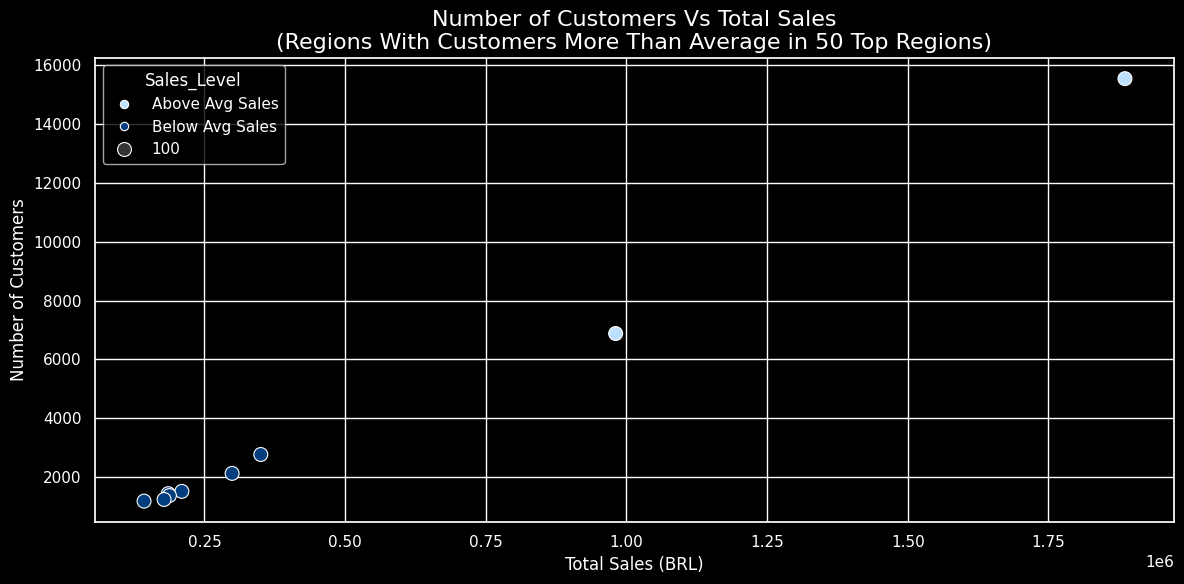

In [52]:
# Create a 'Sales Level' column for coloring
filtered_region_data['Sales_Level'] = filtered_region_data['price'].apply(
    lambda x: 'Above Avg Sales' if x > average_sales_in_filtered_region else 'Below Avg Sales'
)

plt.figure(figsize=(12, 6))
plt.style.use('dark_background')
# sns.set(style="whitegrid")
sns.scatterplot(
    data=filtered_region_data,
    x='price',
    y='num_customers',
    hue='Sales_Level',
    palette={'Above Avg Sales': '#bde0fe', 'Below Avg Sales': '#023E7D'},
    size=100,
    sizes=(100, 200)
)

# Adding plot details
plt.title('Number of Customers Vs Total Sales\n(Regions With Customers More Than Average in 50 Top Regions)', fontsize=16)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Total Sales (BRL)', fontsize=12)

plt.tight_layout()
plt.show()

9 top region yang ditampilkan pada grafik merupakan region dengan jumlah customer diatas rata-rata pada 50 region dengan penjualan teratas. Titik berwarna biru tua merupakan region dengan penjualan dibawah rata-rata pada top region. Sedangkan titik berwarna biru muda merupakan region dengan penjualan diatas rata-rata pada top region.

### Number 2

<ipython-input-27-98d074ad27cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


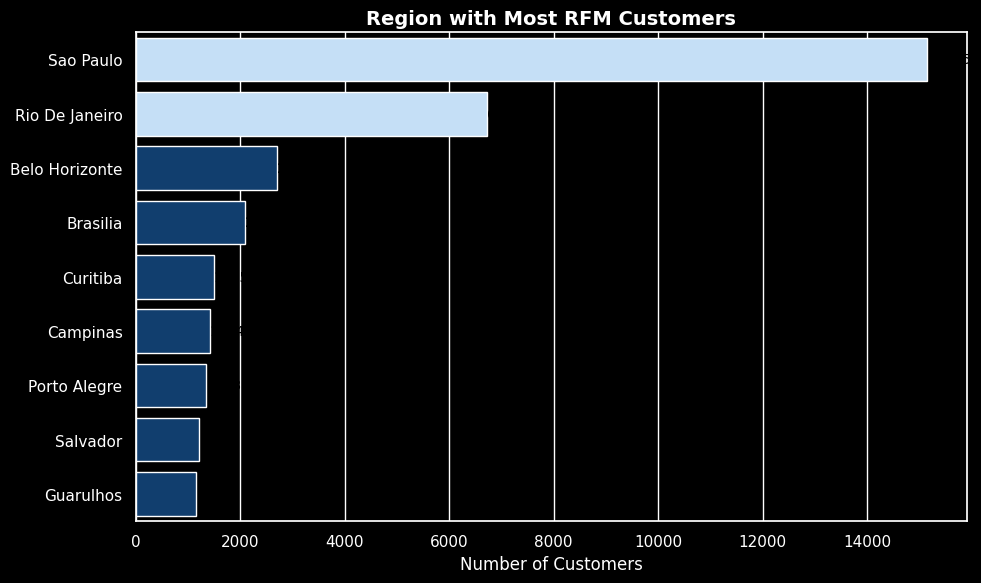

In [27]:
# Create bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=region_counts_rfm,
    x='num_customers',
    y='customer_city',
    order=city_order_by_customers,
    palette=[
        "#bde0fe" if num > average_customers_in_filtered_region else "#023E7D"
        for num in region_counts_rfm['num_customers']
    ]
)

# Add title and labels
barplot.set_title('Region with Most RFM Customers', fontsize=14, weight='bold')
barplot.set_xlabel('Number of Customers', fontsize=12)
barplot.set_ylabel('')  # Remove y-axis label for a cleaner look

# Add annotations for the number of customers
for index, row in region_counts_rfm.iterrows():
    barplot.text(
        row['num_customers'], index, f"{row['num_customers']}",
        color='black', ha='left', va='center', fontsize=10
    )

# Show plot
plt.tight_layout()
plt.show()

Grafik ini bertujuan untuk menampilkan jumlah customer yang valid untuk analisa RFM. Selain itu, grafik ini memberikan dua warna yang sama seperti grafik sebelumnya, untuk memperjelas region apa saja yang memiliki penjualan dibawah rata-rata diatas rata-rata pada top region.

### Number 3

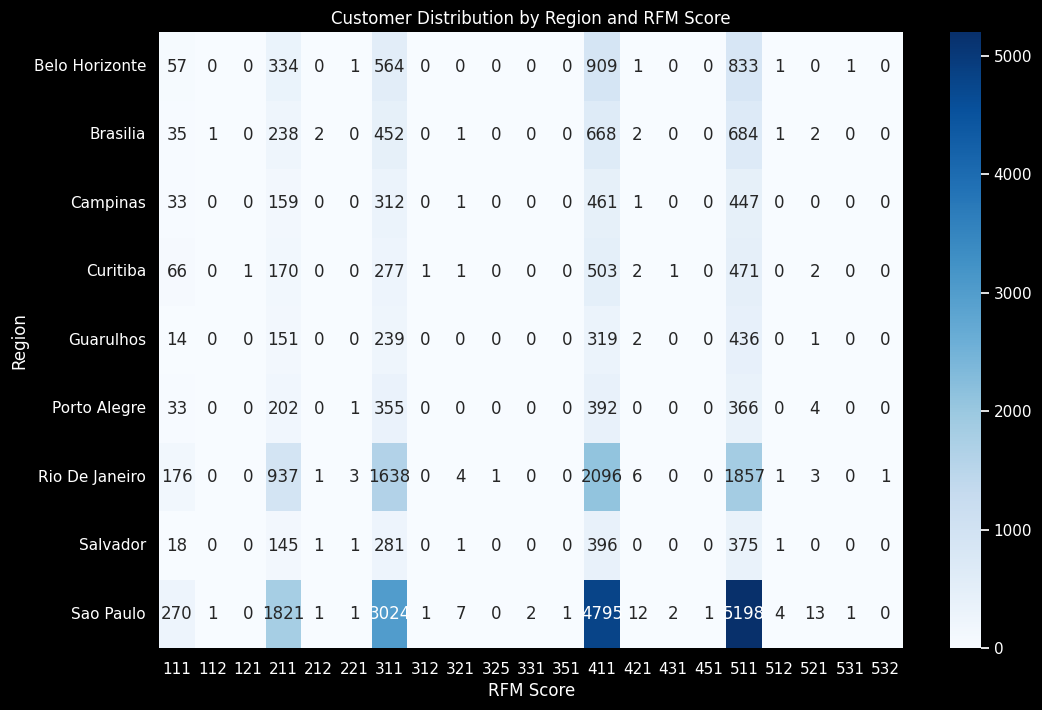

In [31]:
# Visualize customer distribution by region based on RFM score
plt.figure(figsize=(12, 8))
sns.heatmap(
    region_rfm_counts,
    # order=city_order_by_customers,
    annot=True,
    fmt="d",
    cmap='Blues'
    )
plt.title('Customer Distribution by Region and RFM Score')
plt.xlabel('RFM Score')
plt.ylabel('Region')
plt.show()

Grafik heatmap ini bertujuan untuk melanjutkan analisa pada grafik sebelumnya. Pada grafik ini ditampilkan sebaran customer pada setiap top region dengan RFM scorenya masing-masing.



Untuk analisa lebih lanjut. Nilai RFM yang paling banyak berada pada nilai R 5 dan 4. Segmen ini merupakan segmen yang perlu dipertahankan. Kelompok ini tergolong pada segmen pelanggan utama dan setia.

Nilai RFM pada nilai R 3 dan 2 dapat tergolong kepada segmen yang rentan dan perlu dilibatkan kembali untuk mencegah perpindahan pelanggan kepada kompetitor.

Nilai RFM 111 merupakan pelanggan yang sudah tidak aktif. Maka dari itu untuk segmen ini perlu dilakukan kampanye sebagai upaya pengaktifan kembali.

Strategi lanjutan
1. Prioritaskan pelanggan utama dan pelanggan setia karena segmen ini merupakan pendorong pendapatan paling utama.
2. Perlu fokus terhadapp retensi pada segmen rentan dengan cara melakukan promosi dan penawaran personal untuk mencegah perpindahan pelanggan.
3. Untuk melakukan pengaktifan kembali segmen pelanggan yang sudah tidak aktif, perlu dilakukan pertimbangan terhadap biaya yang perlu dikeluarkan

### Number 4

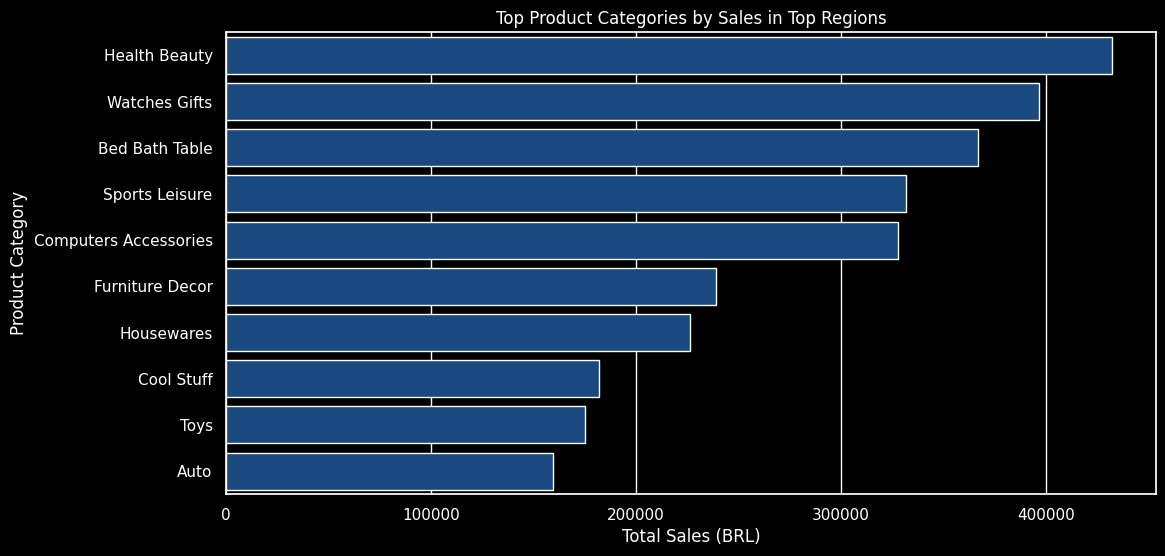

In [53]:
colors = sns.color_palette("Blues_r", 10)

plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='product_category_name_english', data=top_n_categories, color = colors[0])
plt.title(f"Top Product Categories by Sales in Top Regions")
plt.xlabel("Total Sales (BRL)")
plt.ylabel("Product Category")
plt.show()

Grafik ini bertujuan untuk mendukung strategi yang perlu dilakukan dalam rangka meningkatkan RFM Score. Grafik ini menampilkan 10 kategori produk dengan penjualan tertinggi di top region

### Number 5

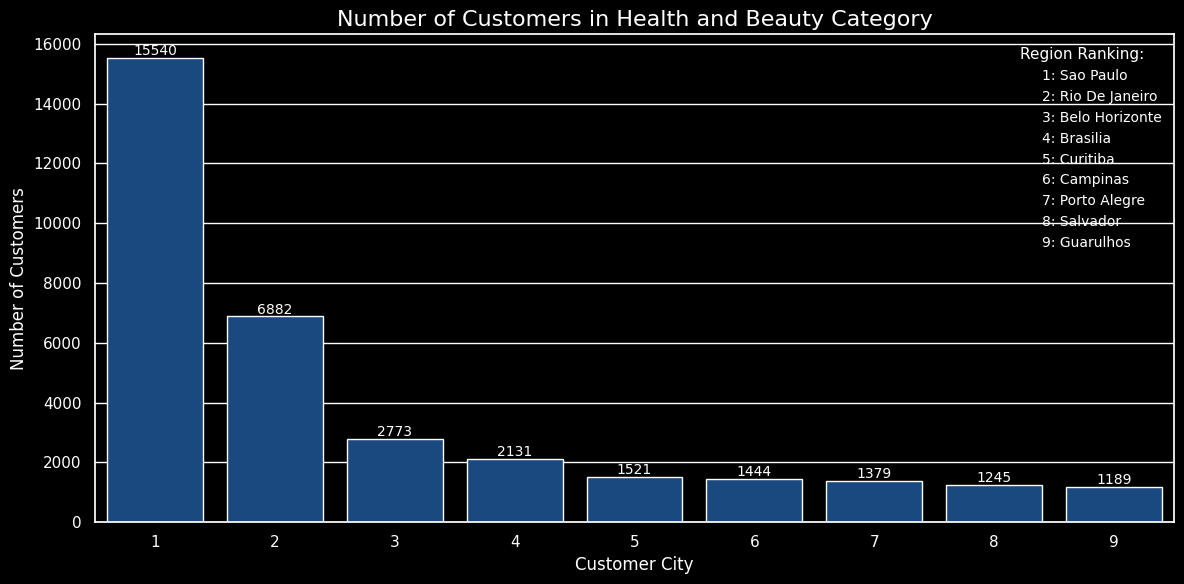

In [55]:
# Step 4: Plotting the bar chart based on the number of customers
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=range(1,10), y='num_customers', data=filtered_health_beauty_data, color=colors[0])

# Adding plot details
plt.title('Number of Customers in Health and Beauty Category', fontsize=16)
plt.xlabel('Customer City', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Annotate each bar
for bar in bars.patches:
    height = bar.get_height()
    if height != 0:
      plt.annotate(f'{int(height)}',  # Text to display (the gap)
                 xy=(bar.get_x() + bar.get_width() / 2, height),  # Position of the annotation
                 xytext=(0, 5),  # Offset the text slightly above the bar
                 textcoords='offset points',  # Set the coordinate system for the offset
                 ha='center', va='center', fontsize=10, color='white')  # Center alignment and text color

# Create a custom legend
city_labels = dict(zip(range(1, 10), region_counts_rfm['customer_city'].head(10)))  # Map 1-10 to customer cities
legend_labels = [f"{rank}: {city}" for rank, city in city_labels.items()]

# Add the legend manually
plt.legend(handles=[plt.Line2D([0], [0], color='none', label=label) for label in legend_labels],
           title="Region Ranking:", loc='upper right', fontsize=10, title_fontsize=11, frameon=False)


plt.tight_layout()
plt.show()

Grafik berikut ini merupakan contoh sebaran customers pada salah satu kategori produk yaitu Health and Beauty.